In [ ]:
!pip install -q tensorflow imbalanced-learn


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))


Saving ML data (1).csv to ML data (1) (8).csv


In [ ]:
target_column = 'Use_Cases'
X = data.drop(columns=[target_column])
y = data[target_column]

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
X_encoded = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_categorical, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.utils import class_weight
import numpy as np
y_train_labels = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    batch_size=20,
                    class_weight=class_weights_dict,
                    verbose=1)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.1009 - loss: 2.2220 - val_accuracy: 0.1429 - val_loss: 2.0591
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2340 - loss: 1.8593 - val_accuracy: 0.2500 - val_loss: 2.0312
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3001 - loss: 1.9441 - val_accuracy: 0.3214 - val_loss: 2.0162
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2261 - loss: 1.7969 - val_accuracy: 0.3214 - val_loss: 2.0134
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2555 - loss: 2.1129 - val_accuracy: 0.2500 - val_loss: 2.0220
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1946 - loss: 1.8386 - val_accuracy: 0.2500 - val_loss: 2.0307
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3042 - loss: 1.7511 - val_accuracy: 0.2500 - val_loss: 2.0345
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3626 - loss: 1.8169 - val_accuracy: 0.2500 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

 Classification Report:
                 precision    recall  f1-score   support

      Biodiesel       0.00      0.00      0.00         6
      Cosmetics       0.00      0.00      0.00         3
           Food       0.22      0.25      0.24         8
     Industrial       0.00      0.00      0.00         5
 Nutraceuticals       0.00      0.00      0.00         1
Pharmaceuticals       0.20      0.20      0.20         5

       accuracy                           0.11        28
      macro avg       0.07      0.07      0.07        28
   weighted avg       0.10      0.11      0.10        28


 Confusion Matrix:


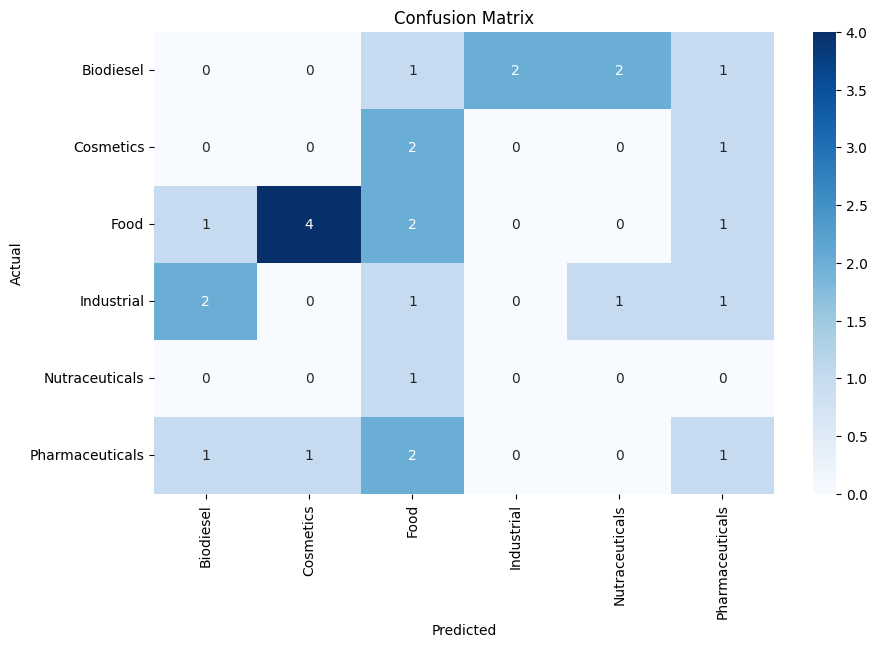

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
print("\n Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("\n Sample Input (first row):")
sample_original = pd.DataFrame(X_encoded).iloc[0]
display(sample_original)
sample_input = scaler.transform([sample_original])
predicted_class_index = model.predict(sample_input).argmax()
predicted_use_case = label_encoder.inverse_transform([predicted_class_index])
print("\n Predicted Use Case for Sample Input:", predicted_use_case[0])


 Sample Input (first row):


,0
Oleic (%),23.4
Linoleic (%),52.7
Saponification (mg KOH/g),195.0
Viscosity (cP),52.5
Density (g/cm3),0.915
...,...
Blend_Tung-Olive 60/40,False
Blend_Tung-Rapeseed 60/40,False
Blend_Walnut-Avocado 70/30,False
Blend_Walnut-Hazelnut 60/40,False


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

 Predicted Use Case for Sample Input: Biodiesel


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))



 Classification Report:
                 precision    recall  f1-score   support

      Biodiesel       0.00      0.00      0.00         6
      Cosmetics       0.00      0.00      0.00         3
           Food       0.22      0.25      0.24         8
     Industrial       0.00      0.00      0.00         5
 Nutraceuticals       0.00      0.00      0.00         1
Pharmaceuticals       0.20      0.20      0.20         5

       accuracy                           0.11        28
      macro avg       0.07      0.07      0.07        28
   weighted avg       0.10      0.11      0.10        28



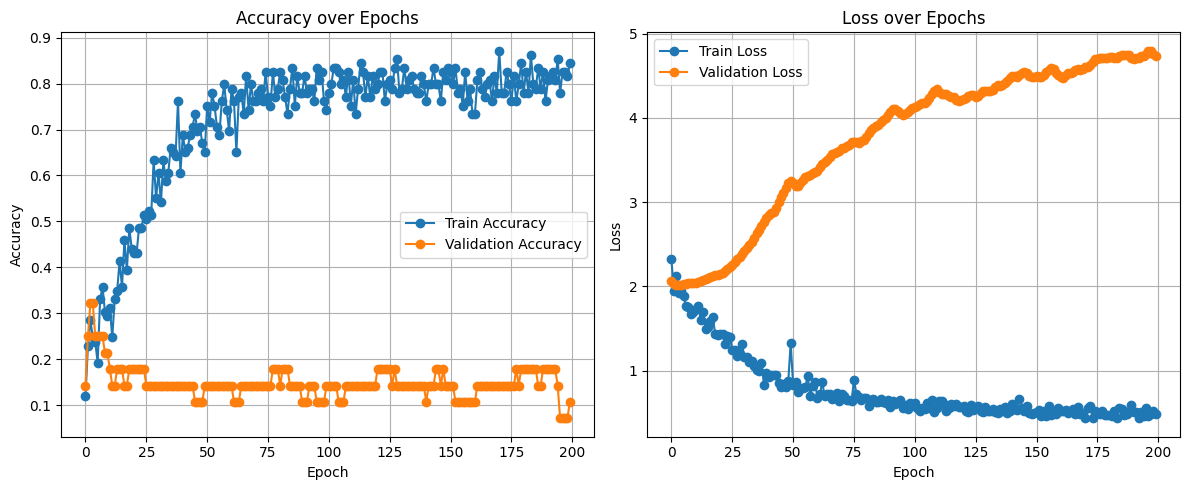

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
